# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install imblearn

In [9]:
#read file
url = "https://drive.google.com/file/d/1aLdiyTBSrAjDSmsgyvYdEsjxc3oITdl8/view?usp=sharing"
path = 'https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url.split('/')[-2])

df = pd.read_csv(path)
df.head()


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [11]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

# Plot label distribution
import seaborn as sns
sns.countplot(x='emotion', data=df)

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [12]:
## parsing data here
images, labels = parse_data(df)

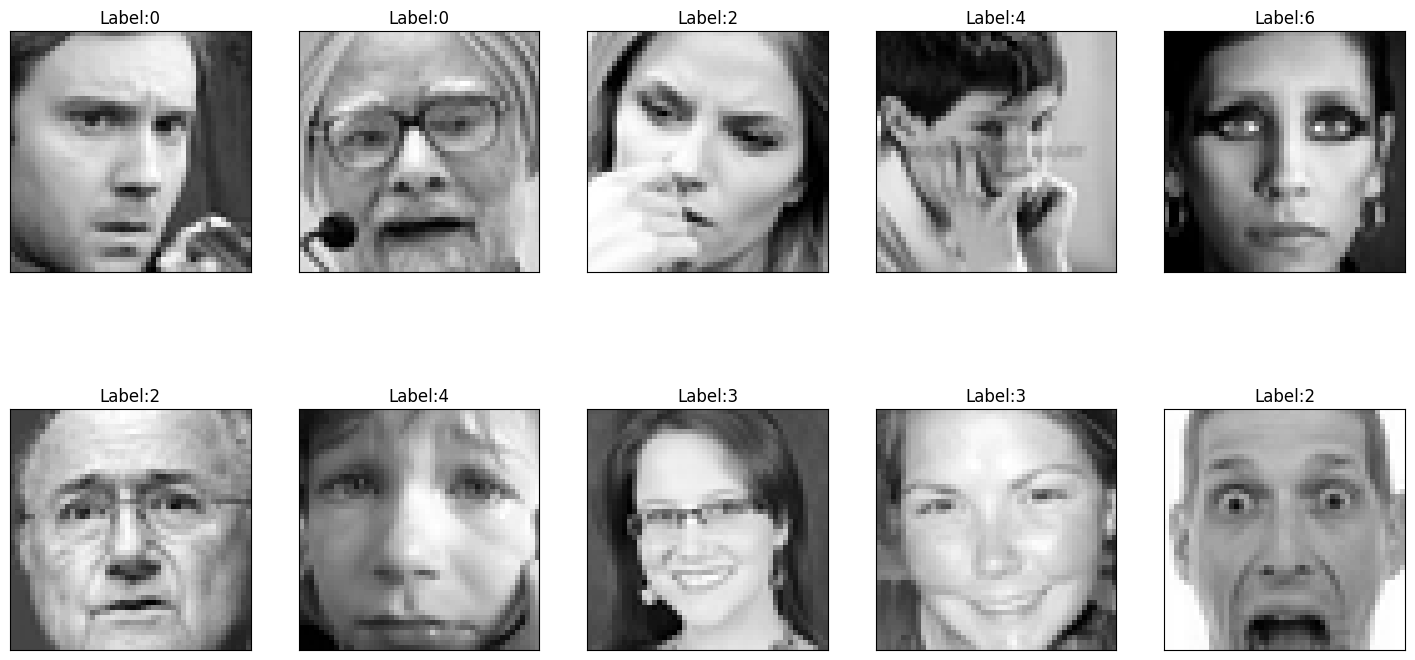

In [13]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
# pca.fit(images) ## modify images' array to the appropriate shape

In [15]:
n_sample, n_x, n_y = images.shape
new_images = images.reshape((n_sample, n_x * n_y))

In [16]:
pca.fit(new_images)

PCA(n_components=2)

In [ ]:
## transform for visualizing here
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape
# images_pca.shape

In [17]:
images_pca=pca.transform(new_images)
images_pca.shape

(35887, 2)

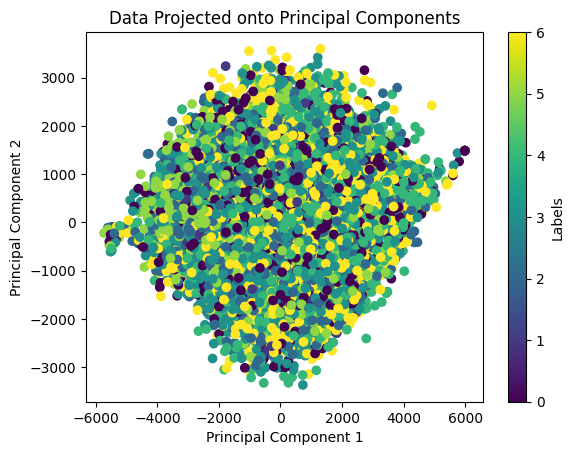

In [18]:
#plot PCA
plt.scatter(x = images_pca[:,0], y = images_pca[:,1], c = labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projected onto Principal Components")
plt.colorbar(label="Labels")
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
## determine the optimal number of PCs here
## pca.explained_variance_()

In [19]:
pca=PCA()
pca.fit(new_images)

PCA()

In [20]:
threshold = 0.95 #(keep 95% of the content)
pca.explained_variance_

array([2.66512420e+06, 9.03136454e+05, 8.68414944e+05, ...,
       4.29082479e+00, 4.17553368e+00, 3.85456269e+00])

In [21]:
#calculate ratio
explained_ratio = pca.explained_variance_ / sum(pca.explained_variance_)
explained_ratio

array([2.89265103e-01, 9.80238969e-02, 9.42553215e-02, ...,
       4.65714084e-07, 4.53200711e-07, 4.18363420e-07])

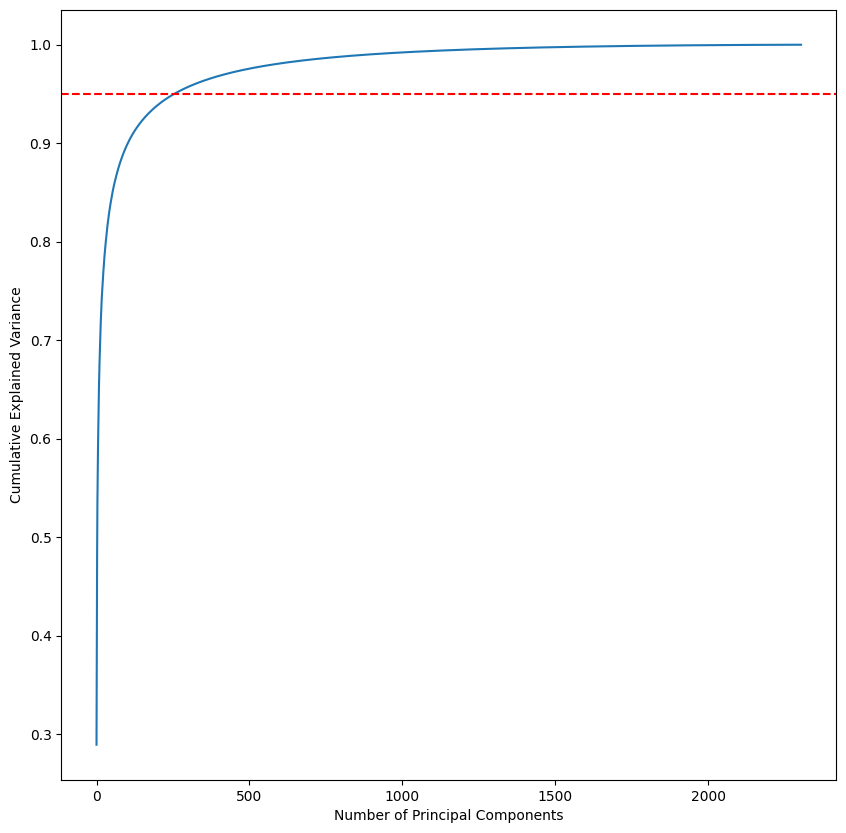

In [24]:
#plot threshold

plt.figure(figsize = (10,10))
plt.plot(np.cumsum(explained_ratio))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [23]:
#calculate optimal number of principal components

n_component = 0
total = 0
for i in explained_ratio:
  total += i
  n_component += 1
  if total >= threshold:
    print("the optimal number of principal components: ", n_component)
    break

the optimal number of principal components:  255


Answer: if we keep all 100% of the data (keep all 48x48 feature), the computation cost is too much.It takes many times to run data. So we want to determine the optimal number of principal components using pca to decrease number of feature. By using "pca.explained_variance_" which is describe the "important" of each feature, we can calculate ratio of each one. Then determine a 'threshold' (95%). After that we sum up the ratio (calculated above) until the sum is equal or pass the threshold and tracking number of components by varible 'n_component'.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
pca=PCA(n_components=255)
pca_images = pca.fit_transform(new_images)

In [ ]:
print(pca_images.shape)
print(labels.shape)

(35887, 255)
(35887,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
PCA_X = pca_images
Original_X = new_images
y = labels
print(PCA_X.shape)
print(Original_X.shape)
print(y.shape)

(35887, 255)
(35887, 2304)
(35887,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from collections import Counter
def oversample_and_shuffle(X, y, random_state=42):
    # Perform oversampling
    oversample = RandomOverSampler(random_state=random_state)
    X_resampled, y_resampled = oversample.fit_resample(X, y)
    print("After oversampling:", Counter(y_resampled))

    # Combine the resampled features and labels for shuffling
    combined = np.c_[X_resampled.reshape(len(X_resampled), -1), y_resampled.reshape(len(y_resampled), -1)]

    # Shuffle the combined array
    np.random.shuffle(combined)

    # Split the combined array back into X and y
    X_shuffled = combined[:, :X_resampled.shape[1]]
    y_shuffled = combined[:, X_resampled.shape[1]]

    return X_shuffled, y_shuffled
original_labels = y.copy()
PCA_X , y = oversample_and_shuffle(PCA_X, y)
Original_X , original_labels = oversample_and_shuffle(Original_X, original_labels)

After oversampling: Counter({0: 8989, 2: 8989, 4: 8989, 6: 8989, 3: 8989, 5: 8989, 1: 8989})
After oversampling: Counter({0: 8989, 2: 8989, 4: 8989, 6: 8989, 3: 8989, 5: 8989, 1: 8989})


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#Split dataset to train and test set
pca_train_x, pca_test_x, pca_train_y, pca_test_y = train_test_split(PCA_X, y, test_size=0.1, random_state=42)
ori_train_x, ori_test_x, ori_train_y, ori_test_y = train_test_split(Original_X, original_labels, test_size=0.1, random_state=42)

# Flatten the 3D image data into 2D
pca_train_x = pca_train_x.reshape(pca_train_x.shape[0], -1)
pca_test_x = pca_test_x.reshape(pca_test_x.shape[0], -1)
ori_train_x = ori_train_x.reshape(ori_train_x.shape[0], -1)
ori_test_x = ori_test_x.reshape(ori_test_x.shape[0], -1)

#Scaling data
scaler = StandardScaler()
pca_train_x = scaler.fit_transform(pca_train_x) #Scaling train and test
pca_test_x = scaler.transform(pca_test_x)
ori_train_x = scaler.fit_transform(ori_train_x)
ori_test_x = scaler.transform(ori_test_x)

print('PCA DATA SHAPE')
print(pca_train_x.shape)
print(pca_train_y.shape)
print(pca_test_x.shape)
print(pca_test_y.shape )

print('\n------------------\n')

print('ORIGINAL DATA SHAPE')
print(ori_train_x.shape)
print(ori_train_y.shape)
print(ori_test_x.shape)
print(ori_test_y.shape )

PCA DATA SHAPE
(56630, 255)
(56630,)
(6293, 255)
(6293,)

------------------

ORIGINAL DATA SHAPE
(56630, 2304)
(56630,)
(6293, 2304)
(6293,)


In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


##XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

def build_xgb_model(X, y):

    pipeline = make_pipeline(xgb.XGBClassifier(tree_method="gpu_hist", use_label_encoder=False, eval_metric='mlogloss'))

    # Define the hyperparameters grid to search
    param_grid = {
        'xgbclassifier__learning_rate': [0.1 , 0.2],
        'xgbclassifier__n_estimators': [400],
        'xgbclassifier__max_depth': [3, 4]
    }

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)


    print(f"Best hyperparameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    return best_model

# Build and train the model with the best hyperparameters
pca_xgb_model = build_xgb_model(pca_train_x, pca_train_y)
ori_xgb_model = build_xgb_model(ori_train_x, ori_train_y)

# Make predictions on the test set
pca_XGB_predictions = pca_xgb_model.predict(pca_test_x)
ori_XGB_predictions = ori_xgb_model.predict(ori_test_x)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:40:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:40:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:40:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Best hyperparameters: {'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 400}
Fitting 2 folds for each of 4 candidates, totalling 8 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:42:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:42:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:42:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time=  35.4s
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time=  31.3s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time= 2.0min


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:44:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:44:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:44:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time=  35.3s
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time=  31.3s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time= 2.0min
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=400; total time= 1.8min
Best hyperparameters: {'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 400}


## DECISION TREE

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

def build_decision_tree_model(X, y):
    model = tree.DecisionTreeClassifier()
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_features': [None, 'sqrt', 'log2']
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")
    return best_model

# Assuming pca_train_x, pca_train_y, ori_train_x, ori_train_y, pca_test_x, ori_test_x are defined
pca_dtree_model = build_decision_tree_model(pca_train_x, pca_train_y)
ori_dtree_model = build_decision_tree_model(ori_train_x, ori_train_y)

pca_dtree_predictions = pca_dtree_model.predict(pca_test_x)
ori_dtree_predictions = ori_dtree_model.predict(ori_test_x)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best hyperparameters: {'criterion': 'gini', 'max_features': None, 'splitter': 'best'}

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best hyperparameters: {'criterion': 'gini', 'max_features': None, 'splitter': 'best'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
def build_model_randomforest(X, y):
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")
    return best_model

# Assuming pca_train_x, pca_train_y, ori_train_x, ori_train_y, pca_test_x, ori_test_x are defined
pca_rf_model = build_model_randomforest(pca_train_x, pca_train_y)
ori_rf_model = build_model_randomforest(ori_train_x, ori_train_y)

pca_rf_pred = pca_rf_model.predict(pca_test_x)
ori_rf_pred = ori_rf_model.predict(ori_test_x)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.6min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 1.0min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time= 1.0min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time= 3.2min
[CV] END max_depth=None, min_samples_split=10, n_estima

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

def build_model_MLP(X,y):
  model = MLPClassifier(hidden_layer_sizes = (100,50), max_iter = 500, activation = 'relu',solver = 'adam')
  model.fit(X,y)
  return model
pca_mlp_model = build_model_MLP(pca_train_x, pca_train_y)
ori_mlp_model = build_model_MLP(ori_train_x, ori_train_y)

pca_mlp_pred = pca_mlp_model.predict(pca_test_x)
ori_mlp_pred = ori_mlp_model.predict(ori_test_x)

In [ ]:
def grid_mlp(X, y):
  grid_mlp = MLPClassifier()
  param_grid = {
      'hidden_layer_sizes' : [(100,), (30,50,20), (50, 50)],
      'activation' : ['logistic', 'relu'],
      'learning_rate_init' : [0.01, 0.1],
      'solver' : ['sgd', 'adam'],
  }
  gs = GridSearchCV(grid_mlp, param_grid, cv = 5)
  gs.fit(X, y)
  return gs

In [ ]:
gs_mlp = grid_mlp(pca_train_x, pca_train_y)

In [ ]:
gs_mlp_pred = gs_mlp.predict(pca_test_x)

In [ ]:
gs_mlp.best_estimator_

MLPClassifier(activation='logistic', learning_rate_init=0.1, solver='sgd')

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score

def evaluate_model(y_true, y_pred):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("precision:", precision_score(y_true, y_pred, average='macro'))
    print("recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1:", f1_score(y_true, y_pred, average='macro'))

    report = classification_report(y_true, y_pred)
    print("Classification Report\n", report)

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='icefire', fmt='d', linewidths=.5)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

###XGBOOST

WITH PCA

accuracy: 0.7260448116955347
precision: 0.7257054797891015
recall: 0.7248156556977462
F1: 0.725014454115177
Classification Report
               precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       935
         1.0       0.99      1.00      1.00       893
         2.0       0.71      0.68      0.69       855
         3.0       0.55      0.59      0.57       910
         4.0       0.61      0.62      0.61       873
         5.0       0.86      0.88      0.87       938
         6.0       0.62      0.62      0.62       889

    accuracy                           0.73      6293
   macro avg       0.73      0.72      0.73      6293
weighted avg       0.73      0.73      0.73      6293



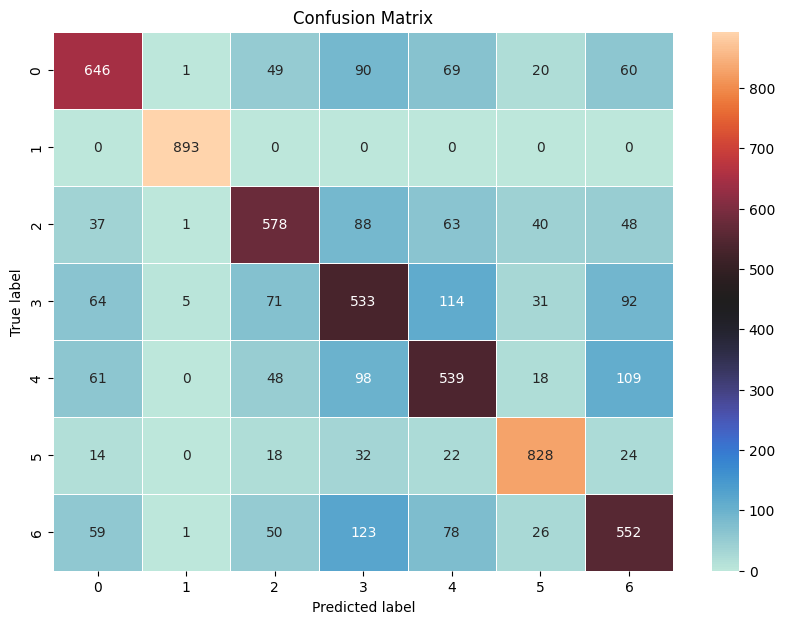

WITHOUT PCA
accuracy: 0.7592563165421897
precision: 0.7616099755007931
recall: 0.761244487964332
F1: 0.7611648245803879
Classification Report
               precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       882
         1.0       1.00      1.00      1.00       876
         2.0       0.75      0.70      0.73       906
         3.0       0.63      0.64      0.63       915
         4.0       0.64      0.64      0.64       919
         5.0       0.88      0.89      0.89       884
         6.0       0.68      0.72      0.70       911

    accuracy                           0.76      6293
   macro avg       0.76      0.76      0.76      6293
weighted avg       0.76      0.76      0.76      6293



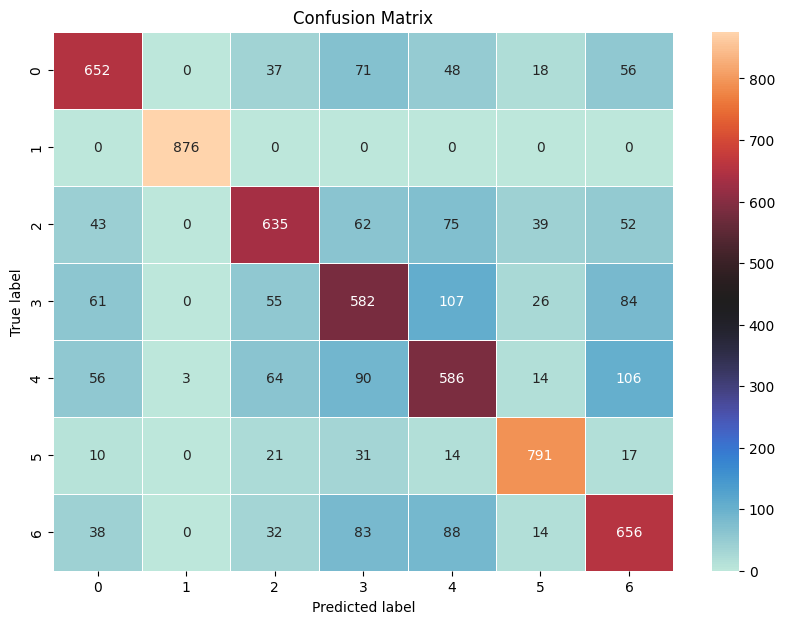

[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time=  31.9s
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time=  28.6s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time= 1.9min
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time= 1.6min
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time=  32.3s
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time=  29.0s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time= 1.9min
[CV] END xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=400; total time= 1.7min
[CV] END xgbclas

In [ ]:
print('WITH PCA\n')
evaluate_model(pca_test_y, pca_XGB_predictions)
print('WITHOUT PCA')
evaluate_model(ori_test_y, ori_XGB_predictions)

##DECISION TREE

DECISION TREE MODEL

WITH PCA

accuracy: 0.7268393453043064

precision: 0.7152965714429511

recall: 0.7257744303705082

F1: 0.7177732439876188

Classification Report

               precision    recall  f1-score   support



         0.0       0.72      0.79      0.76       926

         1.0       0.96      1.00      0.98       867

         2.0       0.71      0.77      0.74       942

         3.0       0.52      0.36      0.43       888

         4.0       0.64      0.65      0.65       896

         5.0       0.84      0.90      0.87       916

         6.0       0.61      0.61      0.61       858



    accuracy                           0.73      6293

   macro avg       0.72      0.73      0.72      6293

weighted avg       0.72      0.73      0.72      6293




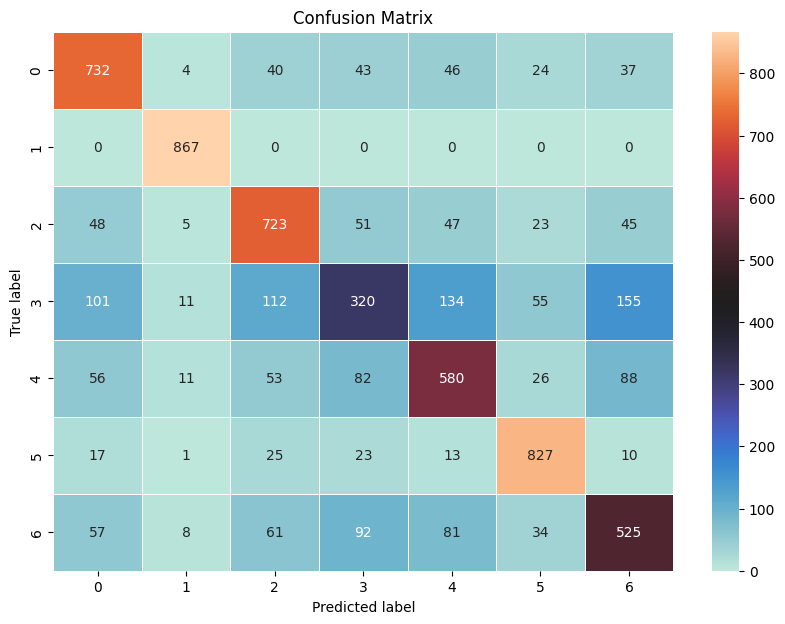





WITHOUT PCA

accuracy: 0.7304941999046559

precision: 0.7182740749149026

recall: 0.7301903405051327

F1: 0.7215148308869302

Classification Report

               precision    recall  f1-score   support



         0.0       0.72      0.81      0.76       875

         1.0       0.97      1.00      0.98       881

         2.0       0.73      0.76      0.75       914

         3.0       0.49      0.34      0.41       890

         4.0       0.63      0.65      0.64       894

         5.0       0.82      0.90      0.86       929

         6.0       0.67      0.64      0.66       910



    accuracy                           0.73      6293

   macro avg       0.72      0.73      0.72      6293

weighted avg       0.72      0.73      0.72      6293




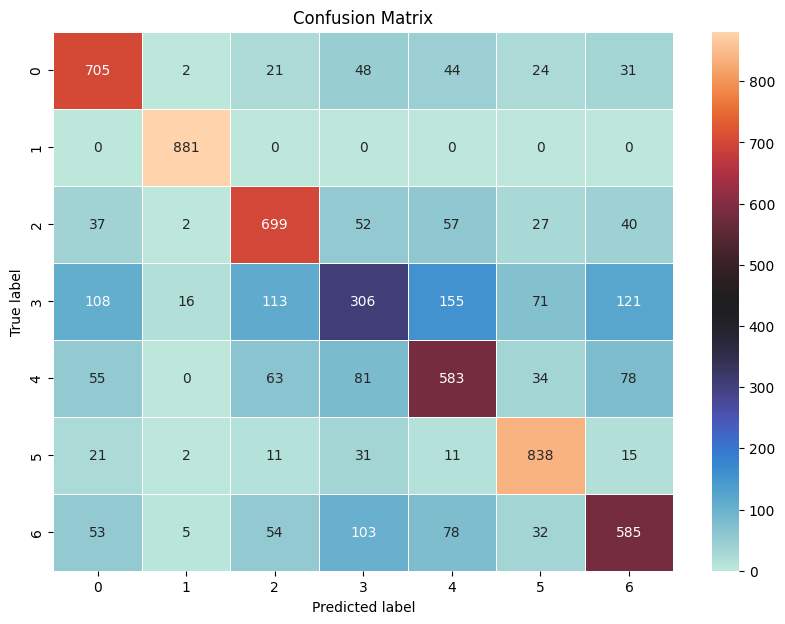

In [ ]:
print('DECISION TREE MODEL')
print('WITH PCA')
evaluate_model(pca_test_y, pca_dtree_predictions)
print('\n\nWITHOUT PCA')
evaluate_model(ori_test_y, ori_dtree_predictions)

##RANDOM FOREST

RANDOM FOREST MODEL
WITH PCA
accuracy: 0.7726044811695535
precision: 0.7897481251349926
recall: 0.7757414666178093
F1: 0.7802971406830822
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.80       861
         1.0       1.00      1.00      1.00       862
         2.0       0.83      0.73      0.78       875
         3.0       0.52      0.68      0.59       919
         4.0       0.72      0.68      0.70       910
         5.0       0.93      0.92      0.92       888
         6.0       0.69      0.67      0.68       978

    accuracy                           0.77      6293
   macro avg       0.79      0.78      0.78      6293
weighted avg       0.79      0.77      0.78      6293



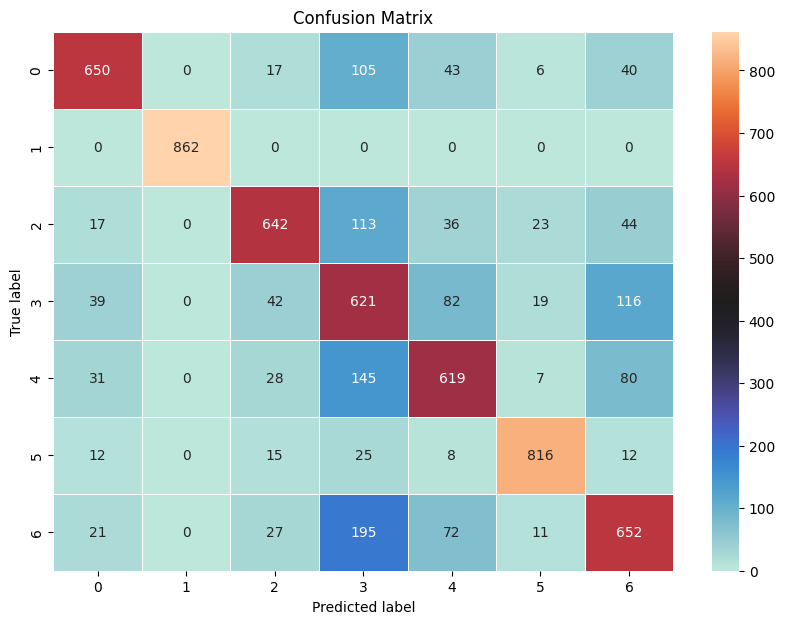



WITHOUT PCA
accuracy: 0.8064516129032258
precision: 0.813057854201236
recall: 0.8105750785086521
F1: 0.811257442837296
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       879
         1.0       1.00      1.00      1.00       825
         2.0       0.86      0.81      0.83       907
         3.0       0.66      0.69      0.67       972
         4.0       0.72      0.75      0.73       929
         5.0       0.89      0.94      0.91       885
         6.0       0.71      0.71      0.71       896

    accuracy                           0.81      6293
   macro avg       0.81      0.81      0.81      6293
weighted avg       0.81      0.81      0.81      6293



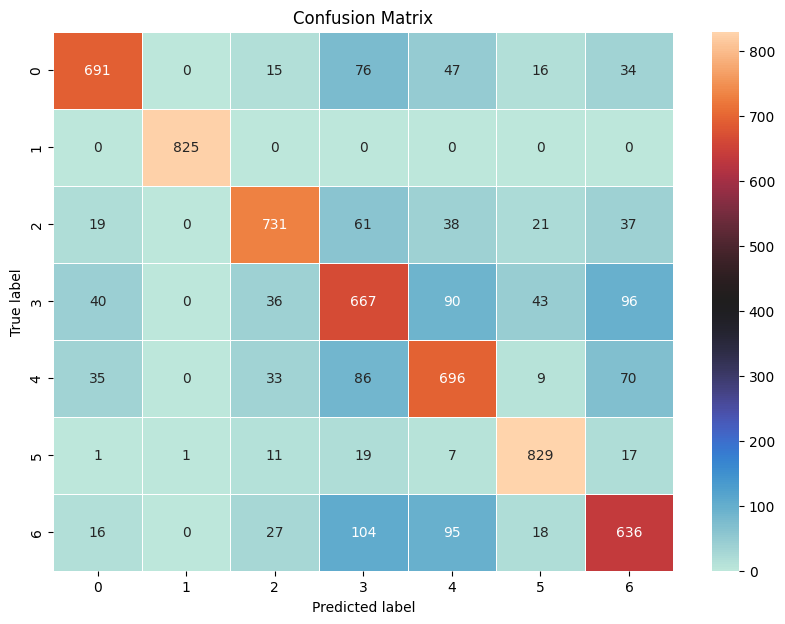

In [ ]:
print('RANDOM FOREST MODEL')
print('WITH PCA')
evaluate_model(pca_test_y, pca_rf_pred)
print('\n\nWITHOUT PCA')
evaluate_model(ori_test_y, ori_rf_pred)

##MLP

accuracy: 0.7505164468457016

precision: 0.7442263397049497

recall: 0.750459621606881

F1: 0.745042169341037

Classification Report

               precision    recall  f1-score   support



         0.0       0.70      0.77      0.73       869

         1.0       0.96      1.00      0.98       909

         2.0       0.72      0.79      0.75       898

         3.0       0.63      0.48      0.55       883

         4.0       0.68      0.66      0.67       942

         5.0       0.85      0.92      0.88       890

         6.0       0.68      0.62      0.65       902



    accuracy                           0.75      6293

   macro avg       0.74      0.75      0.75      6293

weighted avg       0.74      0.75      0.75      6293




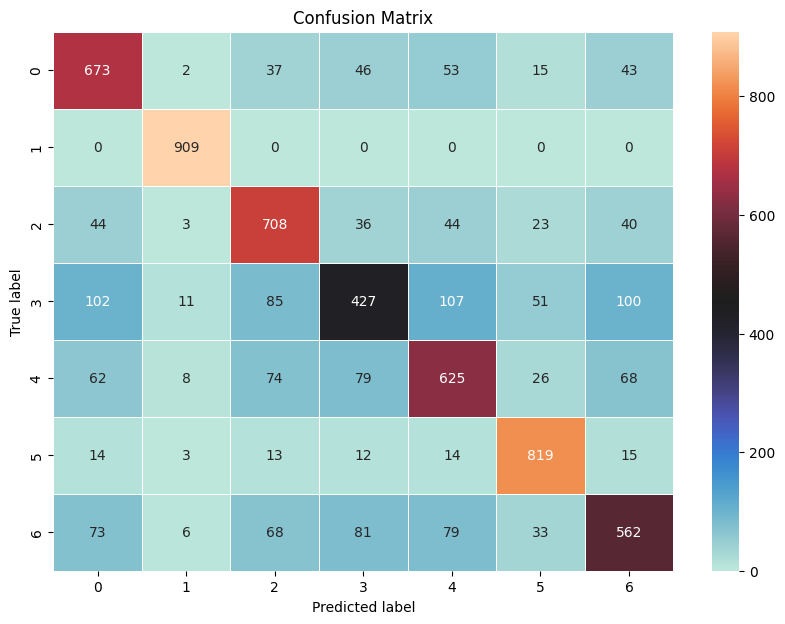

In [ ]:
# evaluate pca data with mlp model
evaluate_model(pca_test_y, pca_mlp_pred)

accuracy: 0.7540123947242968

precision: 0.7526702309216603

recall: 0.7549421905248975

F1: 0.7511536264679399

Classification Report

               precision    recall  f1-score   support



           0       0.72      0.77      0.75       924

           1       0.97      1.00      0.98       912

           2       0.73      0.74      0.74       855

           3       0.69      0.50      0.58       912

           4       0.64      0.68      0.66       915

           5       0.87      0.91      0.89       867

           6       0.65      0.68      0.67       908



    accuracy                           0.75      6293

   macro avg       0.75      0.75      0.75      6293

weighted avg       0.75      0.75      0.75      6293




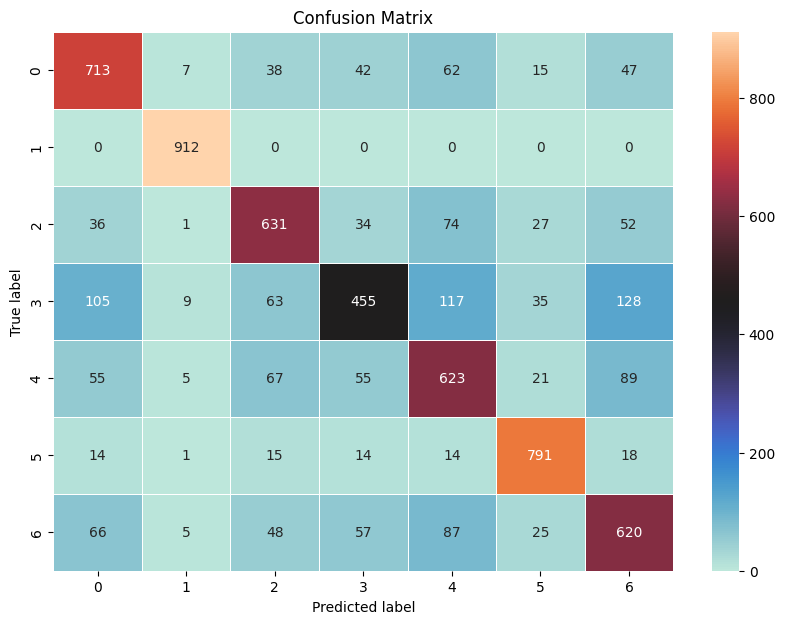

In [ ]:
# evaluate original data with mlp model
evaluate_model(ori_test_y,  ori_mlp_pred)

accuracy: 0.7543302081678055

precision: 0.7466012564676651

recall: 0.75419361806038

F1: 0.7476956759130401

Classification Report

               precision    recall  f1-score   support



         0.0       0.72      0.78      0.75       869

         1.0       0.98      1.00      0.99       909

         2.0       0.71      0.78      0.74       898

         3.0       0.60      0.45      0.51       883

         4.0       0.70      0.67      0.68       942

         5.0       0.83      0.95      0.89       890

         6.0       0.68      0.67      0.67       902



    accuracy                           0.75      6293

   macro avg       0.75      0.75      0.75      6293

weighted avg       0.75      0.75      0.75      6293




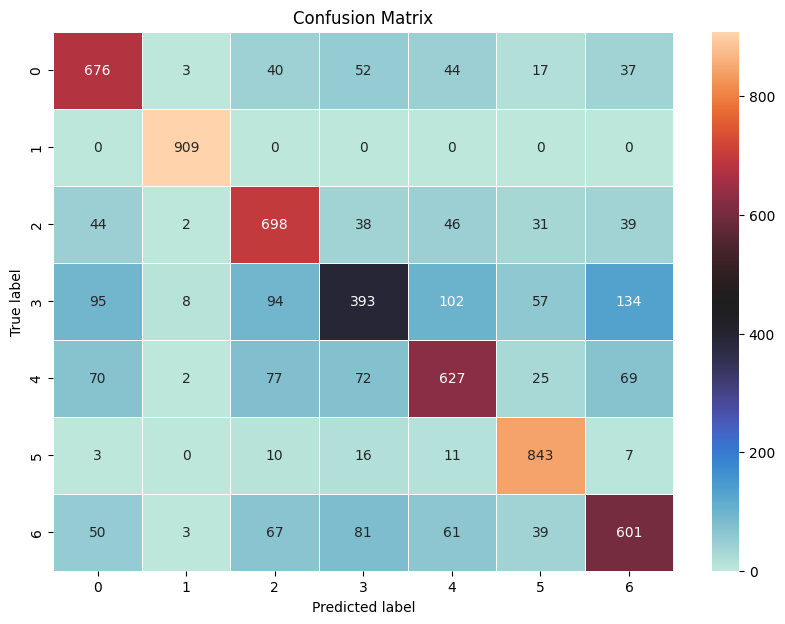

In [ ]:
#mlp after tunning
evaluate_model(pca_test_y, gs_mlp_pred)

####Result performance before PCA and after PCA

+ Before PCA

 Decision Tree:
 + accuracy: 0.7304941999046559

 + precision: 0.7182740749149026

 + recall: 0.7301903405051327

 + F1: 0.7215148308869302

 RandomForest:

  + accuracy: 0.8064516129032258

  + precision: 0.813057854201236
  
  + recall: 0.8105750785086521

  + F1: 0.811257442837296

  XGBoost:

    + accuracy: 0.7592563165421897

    + precision: 0.7616099755007931

    + recall: 0.761244487964332

    + F1: 0.7611648245803879

 MLP:
    + accuracy: 0.7540123947242968

    + precision: 0.7526702309216603

    + recall: 0.7549421905248975

    + F1: 0.7511536264679399
  
+ After PCA

  Decision Tree
  + accuracy: 0.7726044811695535
  + precision: 0.7897481251349926
  + recall: 0.7757414666178093
  + F1: 0.7802971406830822

  Random forest
  + accuracy: 0.7726044811695535
  + precision: 0.7897481251349926
  + recall: 0.7757414666178093
  + F1: 0.7802971406830822

  XGBOOST:
  + accuracy: 0.7260448116955347
  + precision: 0.7257054797891015
  + recall: 0.7248156556977462
  + F1: 0.725014454115177
  
  MLP
  + accuracy: 0.7505164468457016

  + precision: 0.7442263397049497

  + recall: 0.750459621606881

  + F1: 0.745042169341037



Random Forest is the best-performing model both before and after PCA.

**Before PCA:**

It has the highest accuracy (0.8065), which indicates that it correctly predicts the most instances.
It also has the highest precision (0.8131), recall (0.8106), and F1-score (0.8113), demonstrating a strong balance between precision and recall, which means it is reliable in identifying both positive and negative cases accurately.
After PCA:

Although the performance metrics are equal for the Decision Tree and Random Forest models (accuracy, precision, recall, F1-score), the Random Forest model is still preferred because of its robustness and ability to handle large datasets with higher dimensionality effectively. PCA tends to reduce overfitting and improve model performance by reducing dimensionality, but it also shows that the Random Forest model maintains its superior performance consistently across both scenarios.
Most Accurate and Error-Prone Emotion Categories

**Before PCA**

Most Accurate Emotion Category:

*Class 1:* The Random Forest model makes the most accurate predictions for Class 1, as indicated by the highest precision, recall, and F1-score metrics, suggesting that the model is very effective at identifying this emotion correctly.
Most Error-Prone Emotion Category:

*Class 3:* The model makes the most errors in predicting Class 3, which could be due to the lowest precision, recall, or F1-score for this specific class, indicating difficulties in distinguishing this emotion from others.

**After PCA**

Most Accurate Emotion Category:

*Class 1:* Even after PCA, the Random Forest model likely maintains high accuracy for Class 1 based on the overall high performance metrics across the board.
Most Error-Prone Emotion Category:

*Class 3*: Consistent with the performance before PCA, Class 3 remains the most challenging category, likely due to inherent complexities in the data that PCA alone does not fully address.

**Conclusion**

The Random Forest model is the best-performing model due to its highest overall evaluation metrics both before and after PCA application. The model is most accurate for Class 1 and struggles the most with Class 3 in terms of prediction errors. This pattern underscores the model's strength in general performance and specific challenges with certain emotion categories.